### HEALTH INSURANCE COST DATA ANALYSIS AND APPLICATION OF MACHINE LEARNING ALGORITHMS

The importance of health equity drives healthcare costs up high these days. With this in mind, it
would be very interesting to research and analyze a health insurance company’s data to predict
future claim amounts and to possibly identify what factors are driving the costs high.
Problem Statements:
1. Based on health and lifestyle attributes (age, sex, bmi, smoker?, # of children & region), is it possible to predict an individual's health insurance costs accurately? 
2. What are the top 2 main factors that is influencing health care costs?
3. Which region in the US has the highest future claim amounts?
5. Do smokers pay more insurance than non-smokers?
   

In [2]:
import os
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('data/health_ins_data.csv')
data

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [8]:
data.isnull().sum().sort_values(ascending=False)/len(data)


age                     0.0
gender                  0.0
bmi                     0.0
children                0.0
discount_eligibility    0.0
region                  0.0
expenses                0.0
premium                 0.0
dtype: float64

In [10]:
# Look at number of rows/columns, summary statistics and data types (total counts of numberical/categorical)
print("The data has {} rows and {} columns".format(data.shape[0], data.shape[1]))
display(data.describe())
display(data.dtypes.value_counts())

The data has 1338 rows and 8 columns


,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


object     3
float64    3
int64      2
dtype: int64

In [18]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


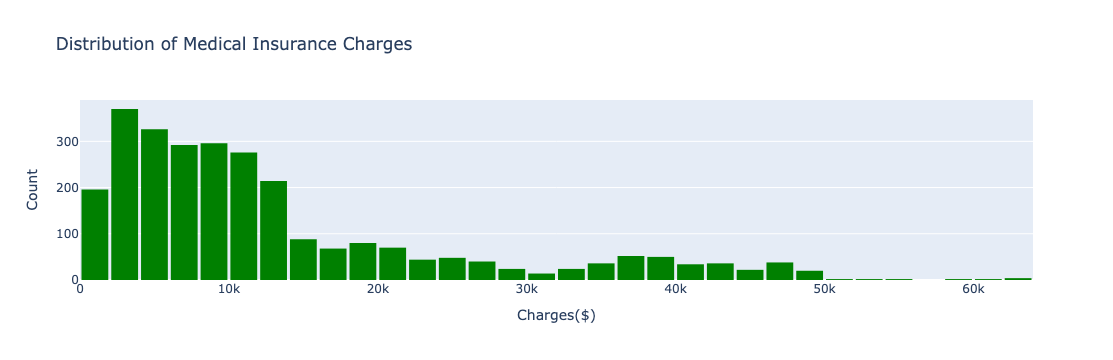

In [22]:
fig = px.histogram(
    data,
    x='charges',
    nbins=50,                      # number of bins
    title='Distribution of Medical Insurance Charges',
    labels={'charges': 'Insurance Charges'}, # label for x-axis
    color_discrete_sequence=['green']  # optional custom color
)

fig.update_layout(
    xaxis_title='Charges($)',
    yaxis_title='Count',
    bargap=0.1
)

fig.show()

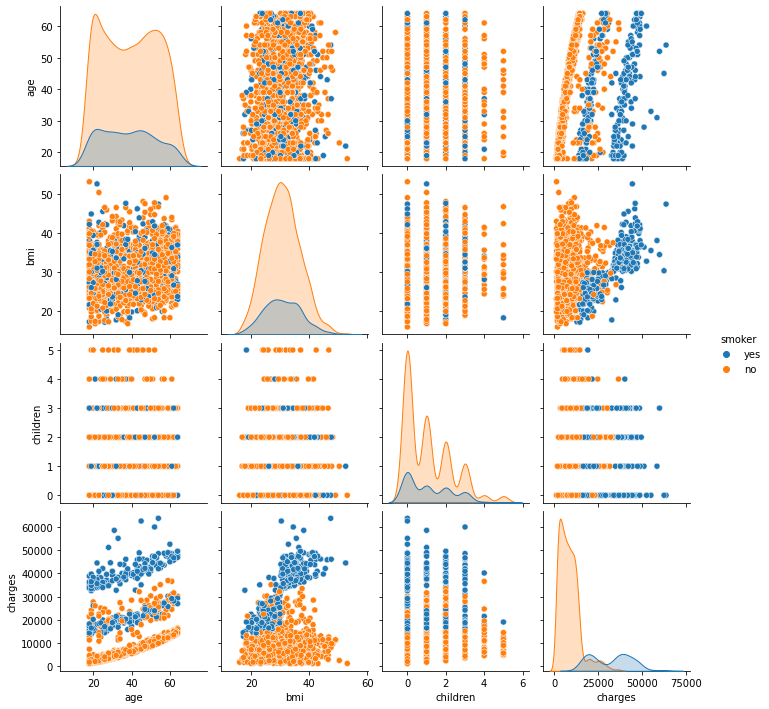

In [34]:
sns.pairplot(data, hue = 'smoker');


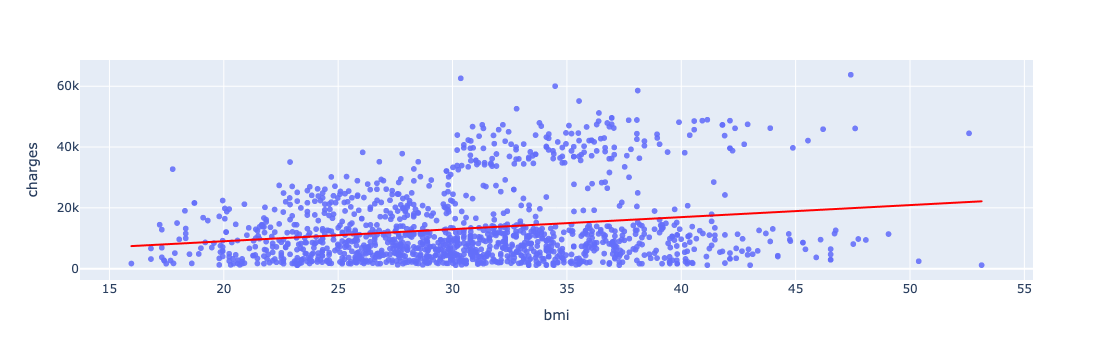

In [15]:

fig = px.scatter(
    data, x='bmi', y='charges', opacity=0.65,
    trendline='ols', trendline_color_override='red'
)
fig.show()